# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

In [119]:
# Insert your answer here and fee free to add markdown cells as needed
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Problem 1A Solution

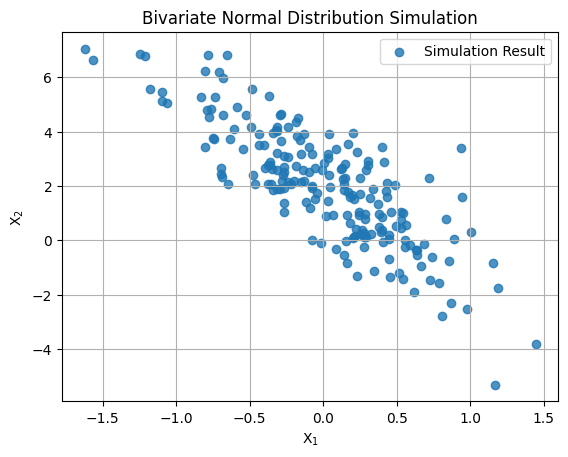

In [120]:
##### Problem 1A Solution #####

# Set seed for reproducibility
np.random.seed(42)

# Mean vector and covariance matrix taken from Example 6.6 on page 200 of Math for ML: https://mml-book.github.io/book/mml-book.pdf
mean_vector = np.array([0, 2])
covariance_matrix = np.array([[0.3, -1], [-1, 5]])
num_samples = 200

# Generate samples from the bivariate normal distribution
samples = np.random.multivariate_normal(mean_vector, covariance_matrix, num_samples)

# Plot the results
plt.scatter(samples[:, 0], samples[:, 1], label='Simulation Result', alpha=0.8)
plt.title('Bivariate Normal Distribution Simulation')
plt.xlabel('$\mathregular{X_1}$')
plt.ylabel('$\mathregular{X_2}$')
plt.legend()
plt.grid(True)
plt.show()

# Problem 1B Solution

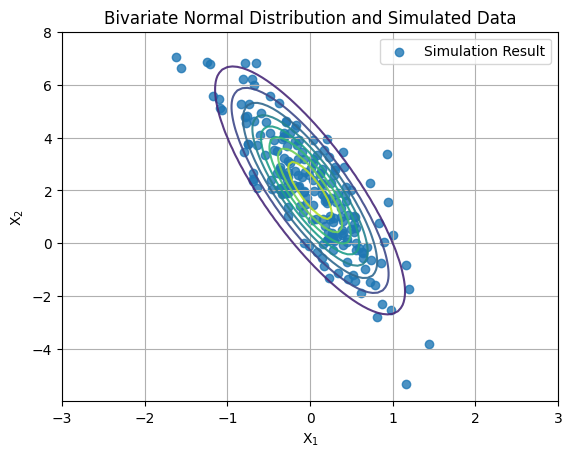

In [121]:
##### Problem 1B Solution #####

# Create a meshgrid for plotting contours
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 8, 100))
pos = np.dstack((x, y))

# Calculate the bivariate normal PDF for the meshgrid
rv = multivariate_normal(mean_vector, covariance_matrix)
z = rv.pdf(pos)

# Plot the contours of the bivariate normal distribution
plt.contour(x, y, z, levels=10, cmap='viridis', alpha=0.9)

# Plot the simulated points
plt.scatter(samples[:, 0], samples[:, 1], label='Simulation Result', alpha=0.8)

# Add labels and legend
plt.title('Bivariate Normal Distribution and Simulated Data')
plt.xlabel('$\mathregular{X_1}$')
plt.ylabel('$\mathregular{X_2}$')
plt.legend()
plt.grid(True)
plt.show()

## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vectors onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ? Show the vectors which denote the first 2 principal components.

### Problem 2B (5 points)

Plot the projected vectors in the subspace of first 2 principal components.

### Problem 2C (10 points)

Reverse the projection to map back to the original 3D space and create a scatter plot to show the reconstructed points. Do the reconstructed points have identical/similar but not identical/different correlations in respective components as the original matrix?



# Problem 2 Solution:

In [122]:
# Set the random seed for reproducibility
np.random.seed(42)

# Covariance matrix
cov_matrix = np.array([[4, 2, 1], [2, 3, 1.5], [1, 1.5, 2]])

# Simulate a 3D Gaussian random vector, set mean vector to origin
mean_vector = np.zeros(3)
random_gauss_vectors = np.random.multivariate_normal(mean_vector, cov_matrix, num_samples)

# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(cov_matrix)

# Display the results
print("Simulated 3D Gaussian random vector:")
print(random_gauss_vectors[:5, :])  # Display only the first 5 rows for readability

print("\nSingular Values as Diagonal Matrix:")
print(np.diag(S))

print("\n U")
print(U)

print("\n Vt")
print(Vt)

Simulated 3D Gaussian random vector:
[[-0.87745873 -1.0769666   0.0627504 ]
 [-2.93873154 -2.02277804 -1.39397809]
 [-2.14274073 -2.53083189 -2.43290628]
 [-1.47687944 -0.2653177  -0.42595077]
 [-2.55138493  1.80145119  0.2558121 ]]

Singular Values as Diagonal Matrix:
[[6.2599587  0.         0.        ]
 [0.         1.89870009 0.        ]
 [0.         0.         0.84134121]]

 U
[[-0.70173922  0.68097512  0.20936798]
 [-0.60421021 -0.41315066 -0.68134907]
 [-0.37748125 -0.60463164  0.70137614]]

 Vt
[[-0.70173922 -0.60421021 -0.37748125]
 [ 0.68097512 -0.41315066 -0.60463164]
 [ 0.20936798 -0.68134907  0.70137614]]


# Problem 2A Solution

In [123]:
# Select the first two principal components
principal_components = U[:, :2]

print("Principal Components:")
print(principal_components)

Principal Components:
[[-0.70173922  0.68097512]
 [-0.60421021 -0.41315066]
 [-0.37748125 -0.60463164]]


# Problem 2B Solution

Projected Data:
[[ 1.24277431 -0.19051898]
 [ 3.81060691 -0.32264772]
 [ 3.95117617  1.05747384]
 [ 1.35748032 -0.63855866]
 [ 0.60538741 -2.6363725 ]]



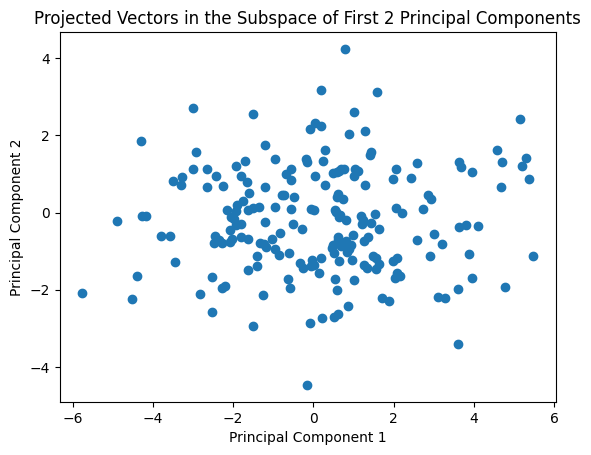

In [124]:
# Project the simulated vectors onto the subspace spanned by the first two principal components
projected_data = np.dot(random_gauss_vectors, principal_components)

print("Projected Data:")
print(projected_data[:5, :])  # Display the projected data for the first 5 rows for readability
print()

# Plot the projected vectors in 2D
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.title('Projected Vectors in the Subspace of First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Problem 2C Solution


The reconstructed points will have similar but not identical correlations in their respective components. This is because reducing the data to its principal components projects the data onto a lower-dimensional subspace while retaining the principal components that capture its maximum variance. When you reverse the projection, you are mapping the points back into the original space using the retained principal components.

The key point is that the principal components capture the directions of maximum variance in the original data. While the magnitudes of the components are preserved during projection and reconstruction, the specific values and correlations may not be identical due to the reduction in dimensionality.

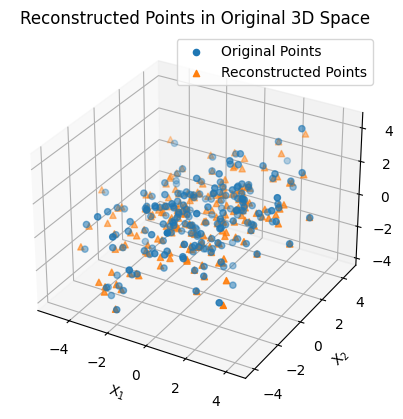

In [125]:
# reconstruct the data using the projected data and the transpose of the principal components
reconstructed_data = np.dot(projected_data, principal_components.T)

# Plot the reconstructed points in the original 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(random_gauss_vectors[:, 0], random_gauss_vectors[:, 1], random_gauss_vectors[:, 2], label='Original Points')
ax.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], reconstructed_data[:, 2], label='Reconstructed Points', marker='^')
ax.set_title('Reconstructed Points in Original 3D Space')
ax.set_xlabel('$\mathregular{X_1}$')
ax.set_ylabel('$\mathregular{X_2}$')
ax.set_zlabel('$\mathregular{X_3}$')
ax.legend()
plt.show()

### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [126]:
def polynomial_features(X, degree):
    """
    Generate polynomial features up to the specified degree.

    Parameters:
    - X: Input features (numpy array with shape [num_samples, num_features])
    - degree: Degree of the polynomial features

    Returns:
    - X_poly: Transformed features with polynomial terms
    """
    num_samples, num_features = X.shape
    X_poly = np.ones((num_samples, 1))  # Include a bias term

    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))

    return X_poly

def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=10, batch_size=1, degree=2):
    """
    Implements the stochastic gradient descent algorithm with polynomial features.

    Parameters:
    - X: Input features (numpy array with shape [num_samples, num_features])
    - y: Target values (numpy array with shape [num_samples, 1])
    - learning_rate: Learning rate for the update step
    - num_epochs: Number of passes through the entire dataset
    - batch_size: Number of samples in each mini-batch
    - degree: Degree of the polynomial features

    Returns:
    - weights: Learned model parameters (numpy array with shape [num_features, 1])
    - losses: List of average losses at each epoch
    """

    # Add polynomial features
    X_poly = polynomial_features(X, degree)

    num_samples, num_features = X_poly.shape
    weights = np.zeros((num_features, 1))
    losses = []

    for epoch in range(num_epochs):
        total_loss = 0.0

        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X_poly[permutation]
        y_shuffled = y[permutation]

        for i in range(0, num_samples, batch_size):
            # Get mini-batch
            X_mini_batch = X_shuffled[i:i + batch_size]
            y_mini_batch = y_shuffled[i:i + batch_size]

            # Compute predictions
            predictions = np.dot(X_mini_batch, weights)

            # Compute loss and gradient using MSE
            error = predictions - y_mini_batch
            loss = np.mean(error ** 2)
            gradient = 2 * np.dot(X_mini_batch.T, error) / batch_size

            # Update weights
            weights -= learning_rate * gradient

            total_loss += loss

        # Average loss for the epoch
        average_loss = total_loss / (num_samples / batch_size)
        losses.append(average_loss)

        # After epoch 5, only prints every 10 epochs to avoid output chaos
        if((epoch + 1) % 10 == 0 or epoch < 5):
          print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss}")

    return weights, losses


# Problem 3 Solution Implemented

## Hyperparameters: batch size = 5, learning rate = 0.015, number of epochs: 60, degree = 3

Batch size of 5 consistently yielded the lowest loss, and was found by simple trial and error. Increasing the learning rate to 0.015 yielded a loss of ~0.80021, which slightly outperformed the standard learning rate of 0.01 with ~0.80573, also discovered by trial and error. Loss rate bottomed out at about 60 epochs, after which the "Training Loss Over Epochs" graph showed a slight tendency towards increased loss rates. Best degree was not surprisingly 3, given the simulated data was generated as a cubic function of X, but this can be confirmed by plugging in 2 and 4 in the degree parameter and notice the function suffers from overfitting with degree 4, and degree 2 leads to a worse loss rate as well.

Epoch 1/60, Average Loss: 1.2582164012738357
Epoch 2/60, Average Loss: 1.1390765355464567
Epoch 3/60, Average Loss: 1.072853719561866
Epoch 4/60, Average Loss: 1.055143119557301
Epoch 5/60, Average Loss: 1.0046734971272842
Epoch 10/60, Average Loss: 0.9983524594122635
Epoch 20/60, Average Loss: 0.8717584301658491
Epoch 30/60, Average Loss: 0.8288745515470621
Epoch 40/60, Average Loss: 0.8259162664394722
Epoch 50/60, Average Loss: 0.8121237037806992
Epoch 60/60, Average Loss: 0.8002136528516586



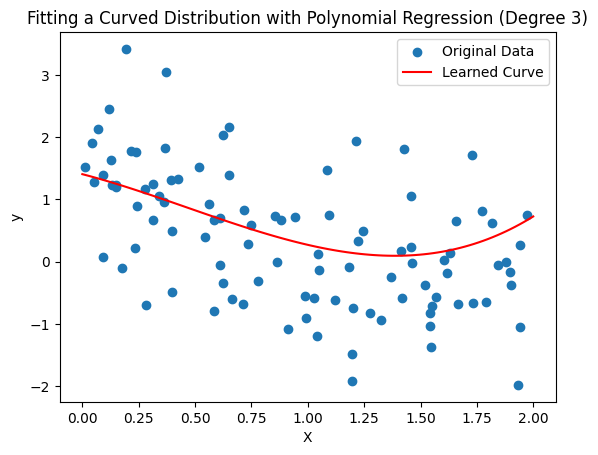

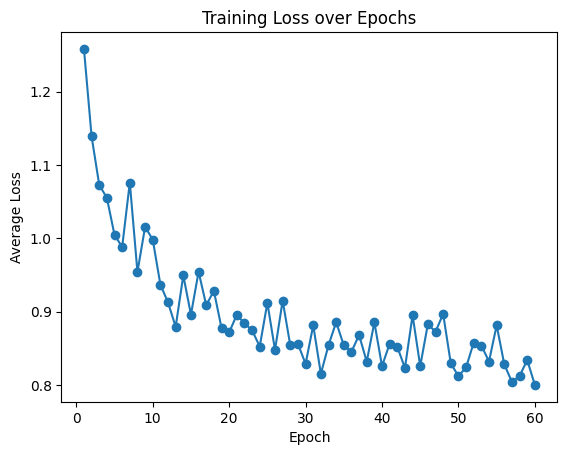

In [127]:
# Generate sample data for a curved distribution
np.random.seed(42)
X = 2 * np.random.rand(100, 1)

# Create arbitrary cubic relationship between X and y
y = 0.5 * X**3 - 1.25 * X**2 + 1 + np.random.randn(100, 1)

# Set hyperparameters
learning_rate = 0.015
num_epochs = 60
batch_size = 5
degree = 3

# Call the stochastic_gradient_descent function
weights, losses = stochastic_gradient_descent(X, y, learning_rate, num_epochs, batch_size, degree)
print()

# Plot the original data
plt.scatter(X, y, label='Original Data')

# Plot the learned curve
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_poly_range = polynomial_features(X_range, degree)
y_pred = X_poly_range.dot(weights)
plt.plot(X_range, y_pred, color='red', label='Learned Curve')

plt.title('Fitting a Curved Distribution with Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
print()

# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.show()


### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements for the linear regression problem from scratch that can improve the convergence speed of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

# Problem 4 Solution: Momentum

In [136]:
# Default momentum_beta value taken from this article: https://www.ruder.io/optimizing-gradient-descent/#adam
def stochastic_gradient_descent_momentum(X, y, learning_rate=0.01, num_epochs=10, batch_size=1, degree=2, momentum_beta=0.9):
    """
    Implements the stochastic gradient descent algorithm with polynomial features and momentum.

    Parameters:
    - X: Input features (numpy array with shape [num_samples, num_features])
    - y: Target values (numpy array with shape [num_samples, 1])
    - learning_rate: Learning rate for the update step
    - num_epochs: Number of passes through the entire dataset
    - batch_size: Number of samples in each mini-batch
    - degree: Degree of the polynomial features
    - momentum_beta: Momentum term (between 0 and 1)

    Returns:
    - weights: Learned model parameters (numpy array with shape [num_features, 1])
    - losses: List of average losses at each epoch
    """

    # Add polynomial features
    X_poly = polynomial_features(X, degree)

    num_samples, num_features = X_poly.shape
    weights = np.zeros((num_features, 1))
    momentum_term = np.zeros_like(weights)  # Initialize momentum term
    losses = []

    for epoch in range(num_epochs):
        total_loss = 0.0

        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X_poly[permutation]
        y_shuffled = y[permutation]

        for i in range(0, num_samples, batch_size):
            # Get mini-batch
            X_mini_batch = X_shuffled[i:i + batch_size]
            y_mini_batch = y_shuffled[i:i + batch_size]

            # Compute predictions
            predictions = np.dot(X_mini_batch, weights)

            # Compute loss and gradient using MSE
            error = predictions - y_mini_batch
            loss = np.mean(error ** 2)
            gradient = 2 * np.dot(X_mini_batch.T, error) / batch_size

            # Update weights with momentum
            momentum_term = momentum_beta * momentum_term + (1 - momentum_beta) * gradient
            weights -= learning_rate * momentum_term

            total_loss += loss

        # Average loss for the epoch
        average_loss = total_loss / (num_samples / batch_size)
        losses.append(average_loss)

        # After epoch 5, only print every 5 epochs to avoid output chaos
        if((epoch + 1) % 5 == 0 or epoch < 5):
            print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss}")

    return weights, losses

# Problem 4 Solution: Momentum Implemented

## Hyperparameters: batch_size = 5, learning rate = 0.015, number of epochs = 45, degree = 3, momentum_beta = 0.8

Batch size, degree, and learning rate were left equal to the unoptimized SGD solution in order to compare results, and the number of epochs was reduced to 45, which led to a similar loss rate to the solution in problem 3 with only 75% of the number of epochs. Momentum beta value was decreased from the default value of 0,9 to 0.8, improving the loss rate by ~0.025.

Note that, as stated in the comments, the default value for momentum beta was recommended by the following article: [An overview of gradient descent optimization algorithms](https://www.ruder.io/optimizing-gradient-descent/#adam)

Epoch 1/45, Average Loss: 1.2319767583765675
Epoch 2/45, Average Loss: 1.152929663018368
Epoch 3/45, Average Loss: 1.0526968501711857
Epoch 4/45, Average Loss: 1.0142780196160102
Epoch 5/45, Average Loss: 0.9965150925474946
Epoch 10/45, Average Loss: 0.9360396236833688
Epoch 15/45, Average Loss: 0.8846211317788153
Epoch 20/45, Average Loss: 0.8773937655827965
Epoch 25/45, Average Loss: 0.8736568322121137
Epoch 30/45, Average Loss: 0.8380922515638879
Epoch 35/45, Average Loss: 0.8305375132792394
Epoch 40/45, Average Loss: 0.8401018511891106
Epoch 45/45, Average Loss: 0.8033760746006692



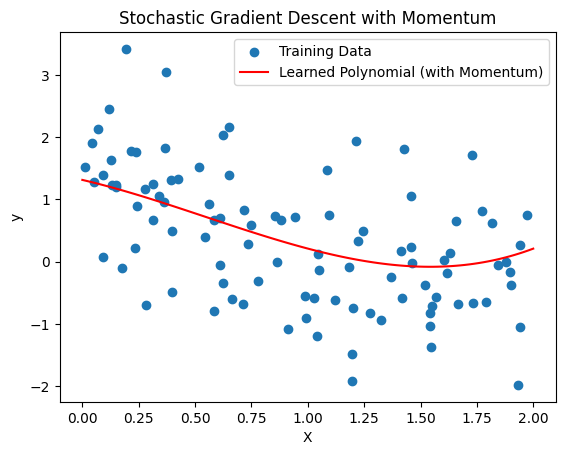

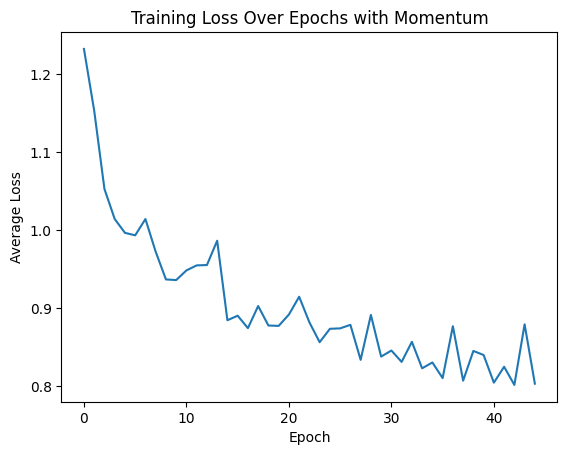

In [150]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 0.5 * X**3 - 1.25 * X**2 + 1 + np.random.randn(100, 1)

# Set hyperparameters
learning_rate = 0.015
num_epochs = 45
batch_size = 5
degree = 3
momentum_beta = 0.8

# Run stochastic gradient descent with momentum
weights_momentum, losses_momentum = stochastic_gradient_descent_momentum(X, y, learning_rate, num_epochs, batch_size, degree, momentum_beta)
print()

# Plot the training data and the learned polynomial with momentum
plt.scatter(X, y, label='Training Data')
x_values = np.linspace(0, 2, 100).reshape(-1, 1)
X_poly = polynomial_features(x_values, degree=3)
y_pred_momentum = X_poly.dot(weights_momentum)
plt.plot(x_values, y_pred_momentum, color='red', label='Learned Polynomial (with Momentum)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Stochastic Gradient Descent with Momentum')
plt.legend()
plt.show()
print()

# Plot the loss curve with momentum
plt.plot(losses_momentum)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss Over Epochs with Momentum')
plt.show()


# Problem 4 Solution: Adam

In [130]:
# Default beta and epsilon values taken from this article: https://www.ruder.io/optimizing-gradient-descent/#adam
def adam_optimizer(parameters, gradients, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Adam optimization algorithm for updating parameters.

    Parameters:
    - parameters: Dictionary containing the parameters to be optimized.
    - gradients: Dictionary containing the gradients of the cost function with respect to parameters.
    - learning_rate: Learning rate for the update step.
    - beta1: Exponential decay rate for the first moment estimate.
    - beta2: Exponential decay rate for the second moment estimate.
    - epsilon: Small constant to prevent division by zero.

    Returns:
    - Updated parameters after one optimization step.
    """
    if not hasattr(adam_optimizer, 'm_cache'):
        adam_optimizer.m_cache = {param_name: np.zeros_like(parameters[param_name]) for param_name in parameters}
        adam_optimizer.v_cache = {param_name: np.zeros_like(parameters[param_name]) for param_name in parameters}
        adam_optimizer.iteration = 0

    adam_optimizer.iteration += 1

    for param_name in parameters:
        adam_optimizer.m_cache[param_name] = beta1 * adam_optimizer.m_cache[param_name] + (1 - beta1) * gradients[param_name]
        adam_optimizer.v_cache[param_name] = beta2 * adam_optimizer.v_cache[param_name] + (1 - beta2) * (gradients[param_name] ** 2)

        m_hat = adam_optimizer.m_cache[param_name] / (1 - beta1 ** adam_optimizer.iteration)
        v_hat = adam_optimizer.v_cache[param_name] / (1 - beta2 ** adam_optimizer.iteration)

        parameters[param_name] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return parameters

def stochastic_gradient_descent_with_adam(X, y, learning_rate=0.01, num_epochs=10, batch_size=1, degree=2, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Implements the stochastic gradient descent algorithm with polynomial features using Adam optimization.

    Parameters:
    - X: Input features (numpy array with shape [num_samples, num_features])
    - y: Target values (numpy array with shape [num_samples, 1])
    - learning_rate: Learning rate for the update step
    - num_epochs: Number of passes through the entire dataset
    - batch_size: Number of samples in each mini-batch
    - degree: Degree of the polynomial features
    - beta1: Exponential decay rate for the first moment estimate
    - beta2: Exponential decay rate for the second moment estimate
    - epsilon: Small constant to prevent division by zero

    Returns:
    - weights: Learned model parameters (numpy array with shape [num_features, 1])
    - losses: List of average losses at each epoch
    """

    # Add polynomial features, must run the first cell in problem 3 to define polynomial_features function
    X_poly = polynomial_features(X, degree)

    num_samples, num_features = X_poly.shape
    weights = np.zeros((num_features, 1))
    losses = []

    for epoch in range(num_epochs):
        total_loss = 0.0

        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X_poly[permutation]
        y_shuffled = y[permutation]

        for i in range(0, num_samples, batch_size):
            # Get mini-batch
            X_mini_batch = X_shuffled[i:i + batch_size]
            y_mini_batch = y_shuffled[i:i + batch_size]

            # Compute predictions
            predictions = np.dot(X_mini_batch, weights)

            # Compute loss and gradient using MSE
            error = predictions - y_mini_batch
            loss = np.mean(error ** 2)
            gradient = 2 * np.dot(X_mini_batch.T, error) / batch_size

            # Update weights using Adam optimization
            weights = adam_optimizer({'weights': weights}, {'weights': gradient}, learning_rate, beta1, beta2, epsilon)['weights']

            total_loss += loss

        # Average loss for the epoch
        average_loss = total_loss / (num_samples / batch_size)
        losses.append(average_loss)

        # Print average loss every 5 epochs after epoch 5
        if( ((epoch + 1) % 5 == 0) or (epoch < 5) ):
          print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {average_loss}")

    return weights, losses

# Problem 4 Solution: Adam Implemented

## Hyperparameters: batch size = 5, learning rate = 0.015, number of epochs: 45, degree = 3, beta1 = 0.95, beta2=0.999, epsilon=1e-8

Batch size, degree, and learning rate were again left equal to the unoptimized SGD solution in order to effectively compare results. The number of epochs was left at 45 to compare performance with the Momentum implementation. beta1 was then slightly increased to .95 to improve the loss rate by ~0.003 as opposed to when beta1 was left at its default value. A further ~0.001 improvement was achieved by decreasing the default beta2 value to 0.995, and the best performanced seemed to occur when epsilon was left at its default value. Adam thereby significantly increased the performance of SGD, leading to a better loss rate in far fewer epochs.

Note that, as stated in the comments, the default values for beta1, beta2, and epsilon were recommended by the following article: [An overview of gradient descent optimization algorithms](https://www.ruder.io/optimizing-gradient-descent/#adam)

Epoch 1/45, Average Loss: 1.2727955877091433
Epoch 2/45, Average Loss: 1.1699925004827731
Epoch 3/45, Average Loss: 1.0549173470420423
Epoch 4/45, Average Loss: 0.9952351527827581
Epoch 5/45, Average Loss: 0.9634002909335126
Epoch 10/45, Average Loss: 0.9105313348515528
Epoch 15/45, Average Loss: 0.8853281027043641
Epoch 20/45, Average Loss: 0.8557897760102223
Epoch 25/45, Average Loss: 0.8315742904649011
Epoch 30/45, Average Loss: 0.8295060422001874
Epoch 35/45, Average Loss: 0.8029226655267117
Epoch 40/45, Average Loss: 0.8161519603457574
Epoch 45/45, Average Loss: 0.795435229715711



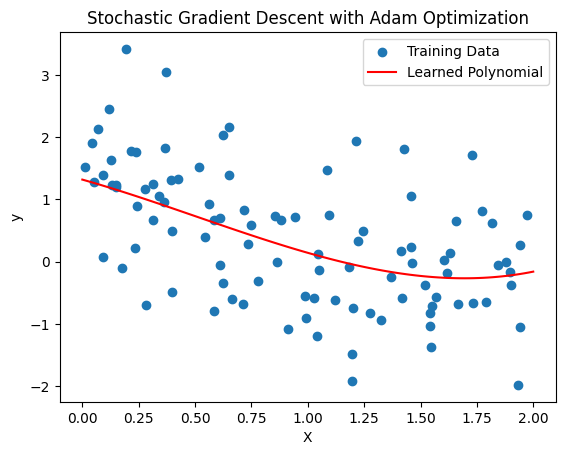

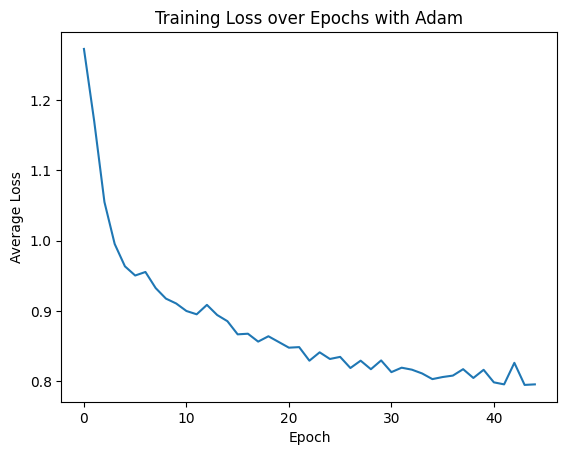

In [143]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)

# Create arbitrary cubic relationship between X and y
y = 0.5 * X**3 - 1.25 * X**2 + 1 + np.random.randn(100, 1)

# Set hyperparameters
learning_rate = 0.015
num_epochs = 45
batch_size = 5
degree = 3
beta1=0.95
beta2=0.9995
epsilon=1e-8

weights, losses = stochastic_gradient_descent_with_adam(X, y,
                                                        num_epochs=num_epochs, learning_rate=learning_rate, batch_size=batch_size, degree=degree,
                                                        beta1=beta1, beta2=beta2, epsilon=epsilon
                                                        )
print()

# Plot the training data and the learned polynomial
plt.scatter(X, y, label='Training Data')
x_values = np.linspace(0, 2, 100).reshape(-1, 1)
X_poly = polynomial_features(x_values, degree=3)
y_pred = X_poly.dot(weights)
plt.plot(x_values, y_pred, color='red', label='Learned Polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Stochastic Gradient Descent with Adam Optimization')
plt.legend()
plt.show()
print()

# Plot the loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss over Epochs with Adam')
plt.show()
print()